<a href="https://colab.research.google.com/github/Rezamoghadam8810/Algorithmic_trading_tutorial/blob/main/Comparing_the_Performance_of_Financial_Instruments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.4f}'.format
import matplotlib.pyplot as plt
# plt.style.use('seaborn')

In [6]:
close=pd.read_csv("/content/close.csv",index_col="Date",parse_dates=["Date"])
close

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-10-01,108.4067,383.6150,1.2628,1214.6000,39.0886,16804.7109
2014-10-02,107.9719,375.0720,1.2624,1214.2000,38.9694,16801.0508
2014-10-03,109.8762,359.5120,1.2671,1192.2000,39.2504,17009.6895
2014-10-04,NaN,328.8660,NaN,NaN,NaN,NaN
2014-10-05,NaN,320.5100,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-26,241.3700,39294.1992,1.2249,1901.3000,243.7286,34323.0508
2021-05-27,250.7000,38436.9688,1.2193,1895.7000,241.6159,34464.6406
2021-05-28,247.0200,35697.6055,1.2193,1902.5000,241.9745,34529.4492


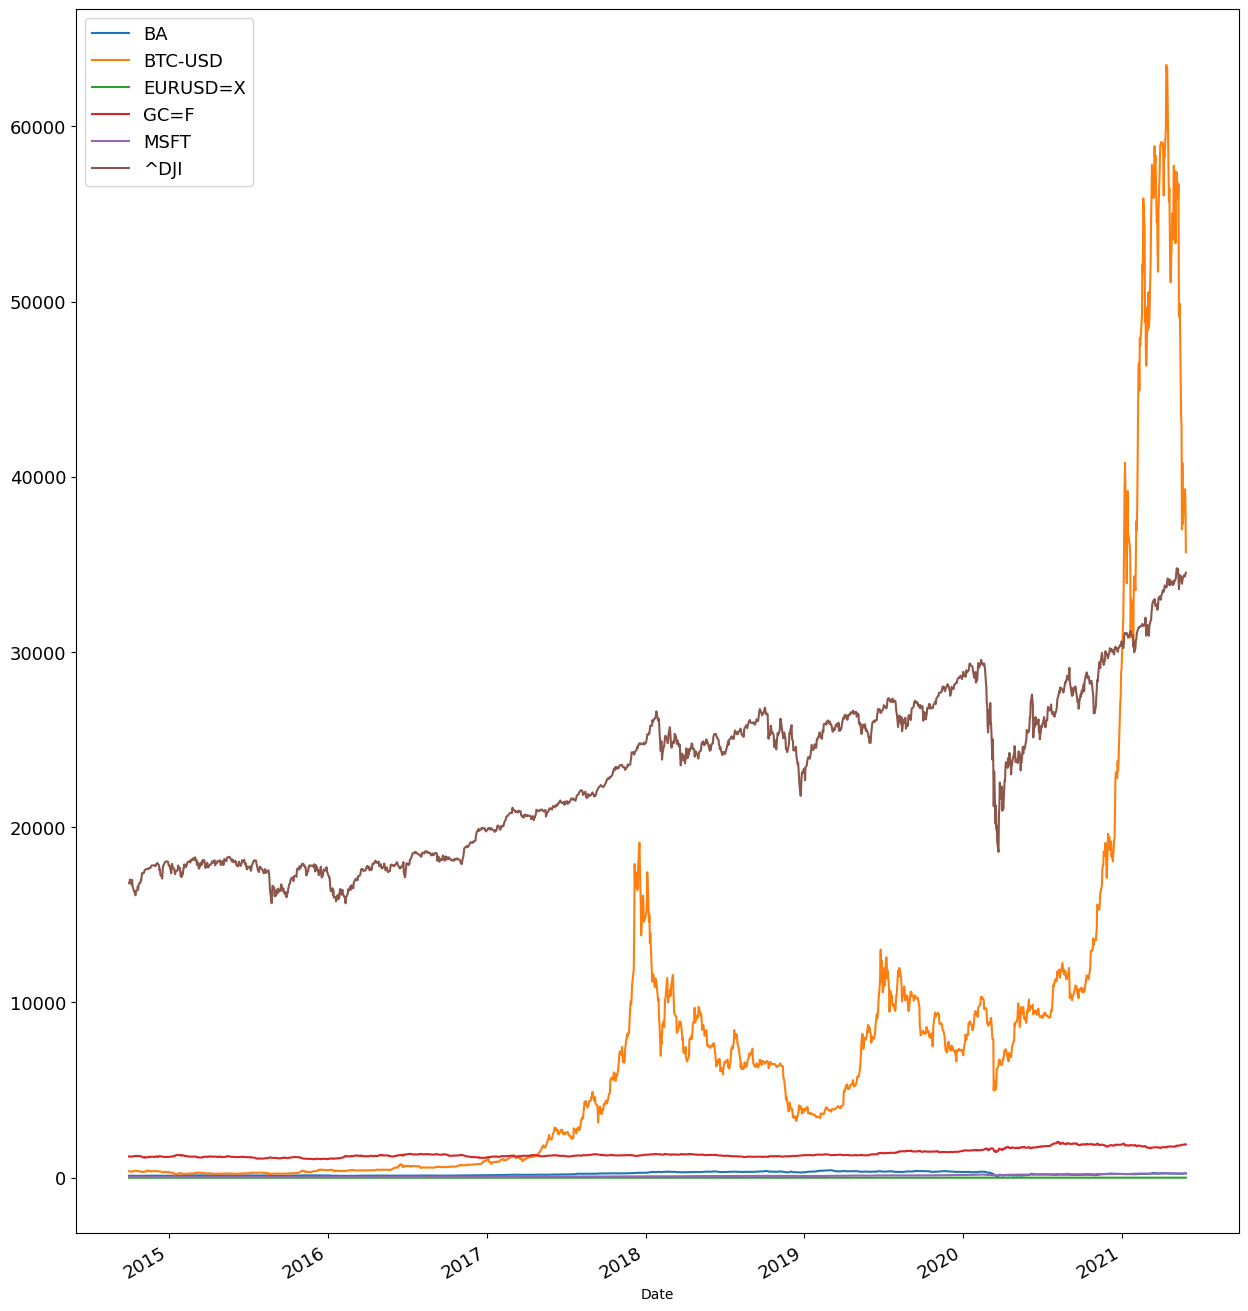

In [8]:
close.dropna().plot(figsize=(15,18),fontsize=13)
plt.legend(fontsize=13)
plt.show()

In [9]:
close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2434 entries, 2014-10-01 to 2021-05-30
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BA        1677 non-null   float64
 1   BTC-USD   2434 non-null   float64
 2   EURUSD=X  1735 non-null   float64
 3   GC=F      1674 non-null   float64
 4   MSFT      1677 non-null   float64
 5   ^DJI      1677 non-null   float64
dtypes: float64(6)
memory usage: 133.1 KB


In [10]:
np.log(close / close.shift()) # keep NaN


,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-10-01,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-02,-0.0040,-0.0225,-0.0003,-0.0003,-0.0031,-0.0002
2014-10-03,0.0175,-0.0424,0.0037,-0.0183,0.0072,0.0123
2014-10-04,NaN,-0.0891,NaN,NaN,NaN,NaN
2014-10-05,NaN,-0.0257,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-26,0.0026,0.0230,0.0028,0.0017,-0.0009,0.0003
2021-05-27,0.0379,-0.0221,-0.0046,-0.0029,-0.0087,0.0041
2021-05-28,-0.0148,-0.0739,0.0000,0.0036,0.0015,0.0019


In [11]:
close.apply(lambda x: np.log(x.dropna() / x.dropna().shift())).info() # remove NaN

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2434 entries, 2014-10-01 to 2021-05-30
Freq: D
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BA        1676 non-null   float64
 1   BTC-USD   2433 non-null   float64
 2   EURUSD=X  1734 non-null   float64
 3   GC=F      1673 non-null   float64
 4   MSFT      1676 non-null   float64
 5   ^DJI      1676 non-null   float64
dtypes: float64(6)
memory usage: 133.1 KB


In [12]:
returns=close.apply(lambda x: np.log(x.dropna() / x.dropna().shift()))
returns

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-10-01,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-02,-0.0040,-0.0225,-0.0003,-0.0003,-0.0031,-0.0002
2014-10-03,0.0175,-0.0424,0.0037,-0.0183,0.0072,0.0123
2014-10-04,NaN,-0.0891,NaN,NaN,NaN,NaN
2014-10-05,NaN,-0.0257,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-26,0.0026,0.0230,0.0028,0.0017,-0.0009,0.0003
2021-05-27,0.0379,-0.0221,-0.0046,-0.0029,-0.0087,0.0041
2021-05-28,-0.0148,-0.0739,0.0000,0.0036,0.0015,0.0019


In [13]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2434 entries, 2014-10-01 to 2021-05-30
Freq: D
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BA        1676 non-null   float64
 1   BTC-USD   2433 non-null   float64
 2   EURUSD=X  1734 non-null   float64
 3   GC=F      1673 non-null   float64
 4   MSFT      1676 non-null   float64
 5   ^DJI      1676 non-null   float64
dtypes: float64(6)
memory usage: 133.1 KB


In [15]:
returns.describe()

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
count,1676.0000,2433.0000,1734.0000,1673.0000,1676.0000,1676.0000
mean,0.0005,0.0019,-0.0000,0.0003,0.0011,0.0004
std,0.0263,0.0395,0.0051,0.0094,0.0172,0.0120
min,-0.2724,-0.4647,-0.0281,-0.0511,-0.1595,-0.1384
25%,-0.0091,-0.0123,-0.0031,-0.0042,-0.0061,-0.0034
50%,0.0008,0.0020,-0.0000,0.0003,0.0010,0.0007
75%,0.0105,0.0178,0.0029,0.0051,0.0091,0.0054
max,0.2177,0.2251,0.0281,0.0578,0.1329,0.1076


In [17]:
summary=returns.agg(["mean","std"]).T
summary

,mean,std
BA,0.0005,0.0263
BTC-USD,0.0019,0.0395
EURUSD=X,-0.0000,0.0051
GC=F,0.0003,0.0094
MSFT,0.0011,0.0172
^DJI,0.0004,0.0120


In [18]:
summary.columns=["mean","std"]
summary

,mean,std
BA,0.0005,0.0263
BTC-USD,0.0019,0.0395
EURUSD=X,-0.0000,0.0051
GC=F,0.0003,0.0094
MSFT,0.0011,0.0172
^DJI,0.0004,0.0120


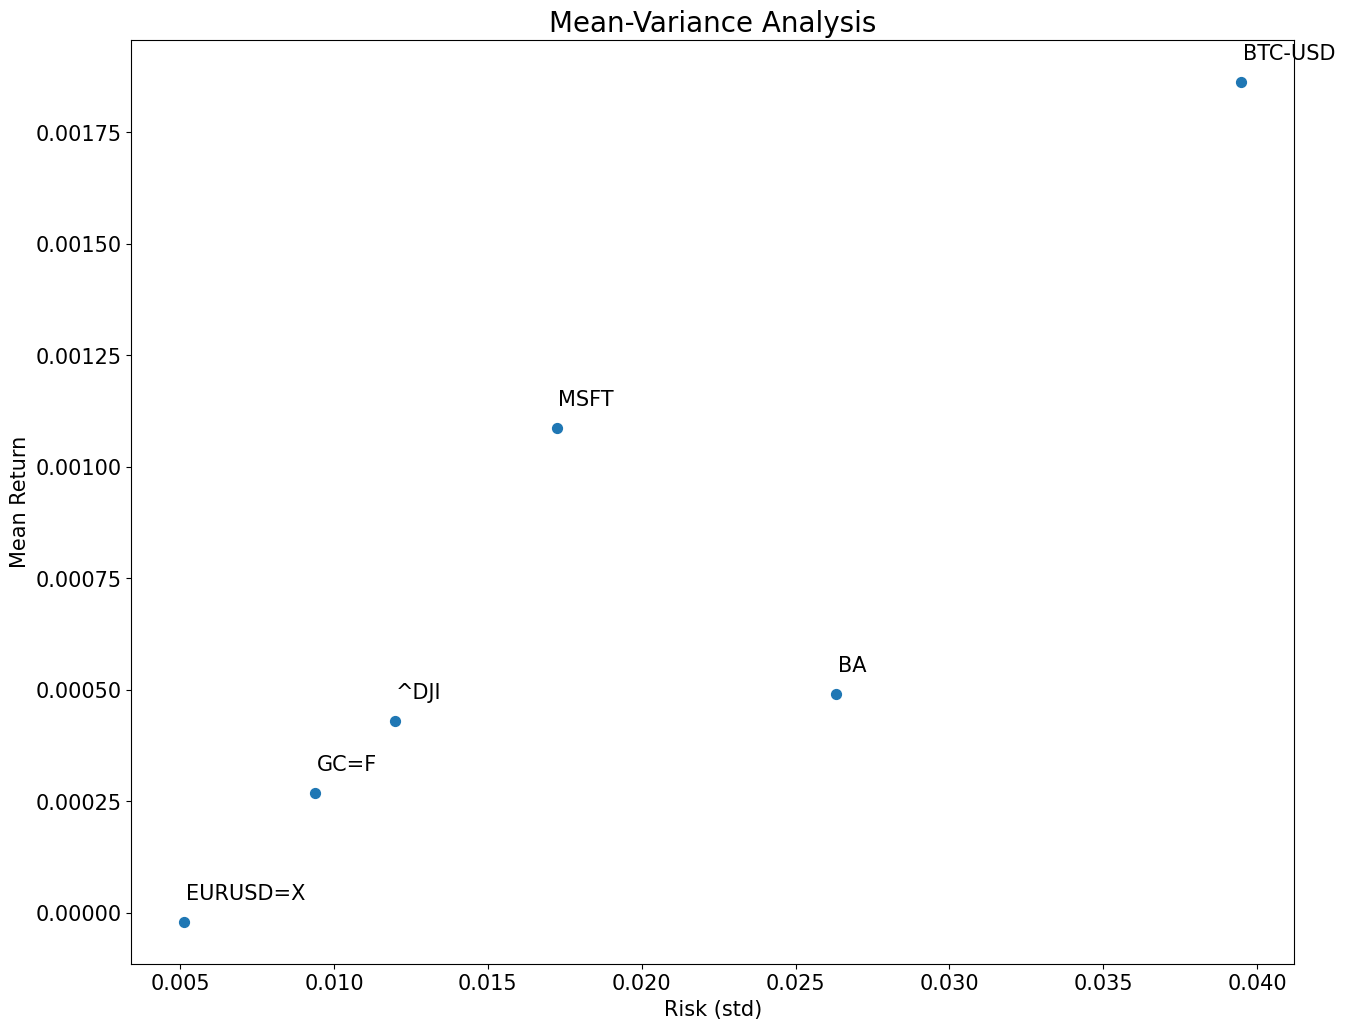

In [20]:
summary.plot(kind="scatter",x="std",y="mean",figsize=(15,12),s = 50 , fontsize =15)
for i in summary.index:
  plt.annotate(i, xy=(summary.loc[i, "std"]+0.00005, summary.loc[i, "mean"]+0.00005), size = 15)
plt.xlabel("Risk (std)",fontsize=15)
plt.ylabel("Mean Return",fontsize=15)
plt.title("Mean-Variance Analysis", fontsize =20)
plt.show()